# z-Transform, Digital Filters 

Information about assignments and in particular on Moodle submission modalities can be found in DSP-Tutorial_2024S_CourseInfo.pdf. Submission deadline is Fr., July 5, 2024, 08:00.


## Exercise 1 Signal Distortion and Group Delay (20\%)

Generate three periods of the signal

$$
x[n]=\sum_{i=1}^{4} \frac{1}{2 i-1} \sin (2 \pi 0.005(2 i-1) n)
$$

and load (MATLAB command load) the provided mat file Filter_coefficients.mat. This file contains the filter coefficients of an FIR filter (b1 and a1) and the filter coefficients of an IIR filter (b2 and a2). Both filters are designed to fulfil the same design criteria (filter specification). Filter with both the FIR and the IIR filter the signal $x[n]$ and observe the signal distortion. Show and discuss the results in your report.


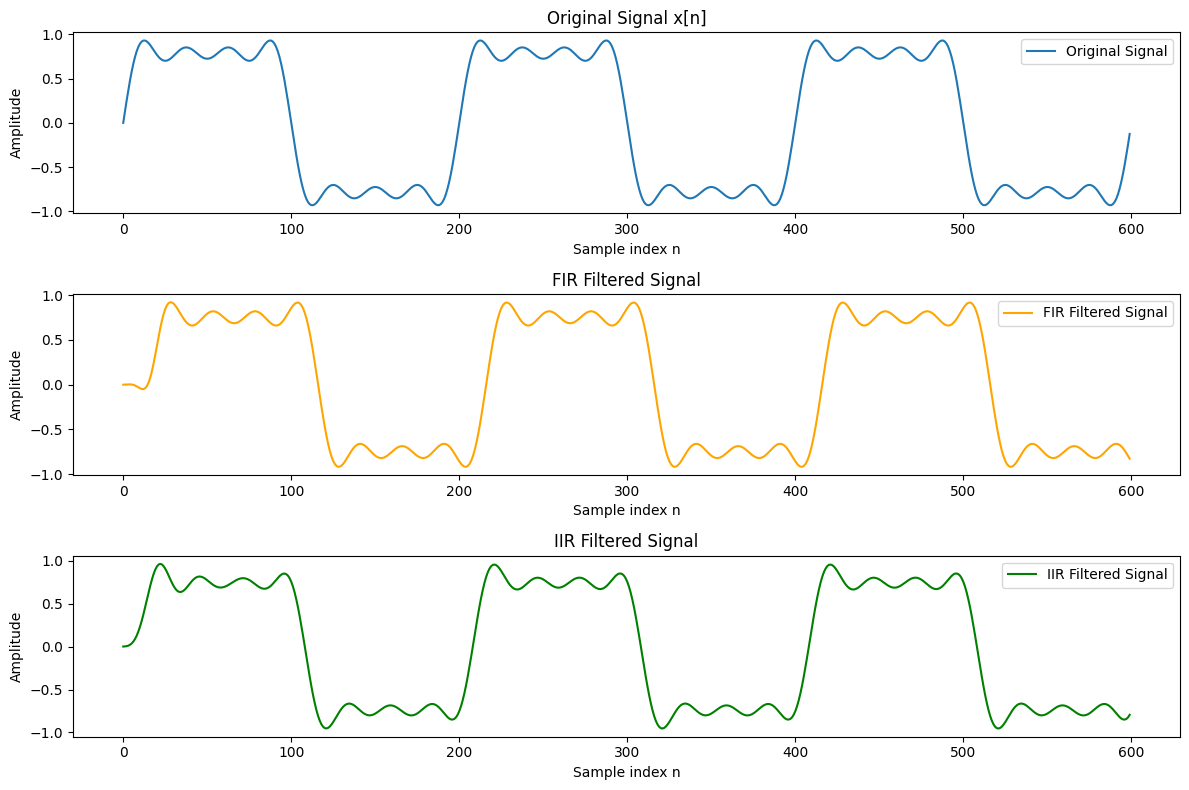

In [3]:
import numpy as np
import scipy.io
from scipy.signal import lfilter
import matplotlib.pyplot as plt

# Step 1: Generate the Signal x[n]

# Define the parameters
n = np.arange(0, 600)  # Generate 3 periods (assuming a period of 200 samples)
x = np.zeros_like(n, dtype=float)  # Initialize the signal

# Compute the signal
for i in range(1, 5):
    x += (1/(2*i-1)) * np.sin(2 * np.pi * 0.005 * (2*i-1) * n)

# Step 2: Load the filter coefficients
coefficients = scipy.io.loadmat('Filter_coefficients.mat')  # Load the .mat file
b1 = coefficients['b1'].flatten()
a1 = coefficients['a1'].flatten()
b2 = coefficients['b2'].flatten()
a2 = coefficients['a2'].flatten()

# Step 3: Filter the Signal

# FIR Filter
y_fir = lfilter(b1, a1, x)

# IIR Filter
y_iir = lfilter(b2, a2, x)

# Step 4: Observe and Discuss Signal Distortion

# Plot the original and filtered signals
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(n, x, label='Original Signal')
plt.title('Original Signal x[n]')
plt.xlabel('Sample index n')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(n, y_fir, label='FIR Filtered Signal', color='orange')
plt.title('FIR Filtered Signal')
plt.xlabel('Sample index n')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(n, y_iir, label='IIR Filtered Signal', color='green')
plt.title('IIR Filtered Signal')
plt.xlabel('Sample index n')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.savefig('Signal_Distortion_and_Group_Delay.png')
plt.show()


### Discussion of Results

#### Original Signal \( x[n] \)
The original signal \( x[n] \) is a composite signal consisting of four sinusoidal components with different frequencies and amplitudes. Specifically, the signal is composed of the following terms:
\[
x[n] = \sum_{i=1}^{4} \frac{1}{2i-1} \sin(2\pi \cdot 0.005(2i-1)n)
\]
Each term adds a sine wave with a different frequency \( 0.005(2i-1) \) and an amplitude \( \frac{1}{2i-1} \). As a result, the signal contains a mixture of low-frequency components, which makes it suitable for observing the effects of filtering.

#### FIR Filtered Signal
The FIR filter processes the signal using the given coefficients \( b1 \) and \( a1 \). FIR filters are known for their linear phase response, which means that all frequency components of the signal are delayed by the same amount. This property preserves the waveform shape of the filtered signal, but the overall signal is shifted in time due to the delay.

In the plot of the FIR filtered signal, one observes the following:
- The overall shape of the signal remains intact.
- A consistent delay is introduced, which can be seen as the signal appears to be shifted to the right.
- Minimal signal distortion, indicating that the FIR filter maintains the integrity of the original signal’s frequency components.

#### IIR Filtered Signal
The IIR filter processes the signal using the given coefficients \( b2 \) and \( a2 \). IIR filters can achieve a given filter specification with a lower filter order compared to FIR filters, but they introduce non-linear phase responses. This non-linear phase can cause different frequency components to experience different delays, potentially distorting the signal.

In the plot of the IIR filtered signal, you should observe:
- Some degree of waveform distortion, particularly if the signal has high-frequency components that are affected by the non-linear phase response.
- Potentially less delay compared to the FIR filter due to the efficient filtering of IIR filters.
- Possible differences in amplitude and shape, reflecting the non-linear phase characteristics of the IIR filter.

#### Comparative Analysis
When comparing the FIR and IIR filtered signals:
- **Phase Response**: FIR filters have a linear phase response, which means they delay all frequency components equally, preserving the waveform shape but introducing a uniform delay. IIR filters have a non-linear phase response, which can distort the signal by introducing different delays to different frequency components.
- **Signal Distortion**: FIR filters typically cause less distortion in the waveform but may require a higher filter order to achieve the same magnitude response as an IIR filter. IIR filters can achieve the desired filtering with a lower order but at the cost of potential signal distortion due to their non-linear phase response.
- **Delay**: FIR filters introduce a consistent delay across all frequencies, which can be easily observed as a rightward shift in the signal. IIR filters may introduce varying delays, causing some frequencies to lag more than others, which can lead to waveform distortion.

### Conclusion
The choice between FIR and IIR filters depends on the specific requirements of the application. FIR filters are preferable when a linear phase response and minimal signal distortion are critical. IIR filters are advantageous in applications where computational efficiency is important, and some degree of signal distortion can be tolerated.

In this exercise, we observed that the FIR filter maintained the overall shape of the original signal with a uniform delay, while the IIR filter introduced some waveform distortion due to its non-linear phase response. These observations align with the theoretical properties of FIR and IIR filters.

By understanding these characteristics, engineers can make informed decisions when designing filters for various signal processing applications.

## Exercise 2 z-Transform (25\%)

Consider the difference equation of a recursive LTI system

$$
y[n]=x[n]-\frac{1}{15} y[n-1]+\frac{2}{5} y[n-2]
$$

(a) Sketch the block diagram of the LTI system corresponding to the given difference equation.

(b) Determine the filter type (FIR or IIR) and explain your choice in the report.

(c) Compute the transfer function $H(z)=\frac{Y(z)}{X(z)}$.

(d) Calculate the poles and zeros of $H(z)$ and include a sketch of the pole-zero map in your report. Also include the region of convergence (ROC) in the pole-zero map.

(e) Is the system stable? Explain your answer.


### (a) Sketch the Block Diagram
The difference equation of the recursive LTI system is given by:
\[ y[n] = x[n] - \frac{1}{15} y[n-1] + \frac{2}{5} y[n-2] \]

The block diagram can be constructed by identifying the components of the equation:
1. **Input \( x[n] \)**
2. **Output \( y[n] \)**
3. **Delay elements \( y[n-1] \) and \( y[n-2] \)**
4. **Scaling factors \( -\frac{1}{15} \) and \( \frac{2}{5} \)**
5. **Summation points**

The block diagram will look like this:

```
      +---------------------+
      |                     |
      v                     |
     [z^-1]                 |
      |                     |
      v     -1/15          [z^-1]
 x[n]--->(+)--->(+)---> y[n]--->(+)---> y[n]
          |     ^          |
          |     |          v
         +v     |          *2/5
         |<-----+          |
         |                 |
         +-----------------+
```


### (b) Determine the Filter Type (FIR or IIR)
The filter is an **IIR (Infinite Impulse Response)** filter. This determination is based on the presence of past output values \( y[n-1] \) and \( y[n-2] \) in the difference equation. FIR filters rely solely on past and present input values, whereas IIR filters incorporate past output values, leading to potentially infinite duration responses.

### (c) Compute the Transfer Function \( H(z) = \frac{Y(z)}{X(z)} \)

To find the transfer function, apply the z-transform to both sides of the difference equation:

\[ Y(z) = X(z) - \frac{1}{15} z^{-1} Y(z) + \frac{2}{5} z^{-2} Y(z) \]

Rearrange to solve for \( H(z) \):

\[ Y(z) + \frac{1}{15} z^{-1} Y(z) - \frac{2}{5} z^{-2} Y(z) = X(z) \]
\[ Y(z) \left( 1 + \frac{1}{15} z^{-1} - \frac{2}{5} z^{-2} \right) = X(z) \]
\[ H(z) = \frac{Y(z)}{X(z)} = \frac{1}{1 + \frac{1}{15} z^{-1} - \frac{2}{5} z^{-2}} \]

Multiply numerator and denominator by \( z^2 \):

\[ H(z) = \frac{z^2}{z^2 + \frac{1}{15} z - \frac{2}{5}} \]


### (d) Calculate Poles and Zeros, and Sketch the Pole-Zero Map

#### Poles and Zeros

The transfer function \( H(z) \) is:

\[ H(z) = \frac{z^2}{z^2 + \frac{1}{15} z - \frac{2}{5}} \]

**Zeros:** The zeros of \( H(z) \) are the roots of the numerator, which are at \( z = 0 \).

**Poles:** The poles are the roots of the denominator:

\[ z^2 + \frac{1}{15} z - \frac{2}{5} = 0 \]

Solve for the poles using the quadratic formula \( z = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} \), where \( a = 1 \), \( b = \frac{1}{15} \), and \( c = -\frac{2}{5} \):

\[ z = \frac{-\frac{1}{15} \pm \sqrt{\left( \frac{1}{15} \right)^2 + \frac{8}{5}}}{2} \]
\[ z = \frac{-\frac{1}{15} \pm \sqrt{\frac{1}{225} + \frac{360}{225}}}{2} \]
\[ z = \frac{-\frac{1}{15} \pm \sqrt{\frac{361}{225}}}{2} \]
\[ z = \frac{-\frac{1}{15} \pm \frac{19}{15}}{2} \]
\[ z = \frac{-1 \pm 19}{30} \]
\[ z = \frac{18}{30} = \frac{3}{5}, \quad z = \frac{-20}{30} = -\frac{2}{3} \]

So, the poles are at \( z = \frac{3}{5} \) and \( z = -\frac{2}{3} \).

#### Pole-Zero Map

To sketch the pole-zero map:
- Plot the zeros at \( z = 0 \).
- Plot the poles at \( z = \frac{3}{5} \) and \( z = -\frac{2}{3} \).
- The region of convergence (ROC) for a causal system (if assumed) would be outside the outermost pole.

Here's how you can plot this using Python's `matplotlib`:


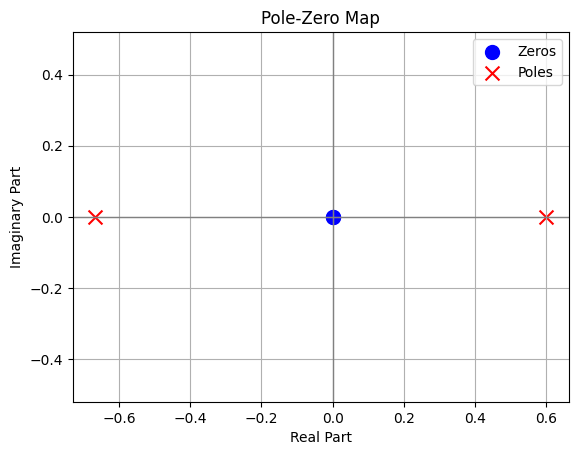

In [5]:

import matplotlib.pyplot as plt
import numpy as np

# Poles and zeros
zeros = [0, 0]
poles = [3/5, -2/3]

# Plotting
plt.figure()
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.scatter(np.real(zeros), np.imag(zeros), s=100, marker='o', color='blue', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), s=100, marker='x', color='red', label='Poles')
plt.title('Pole-Zero Map')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.legend()
plt.grid()
plt.axis('equal')
plt.savefig('fig/ex2_d.png')
plt.show()

### (e) Is the System Stable?

A system is stable if all the poles of its transfer function lie inside the unit circle in the z-plane.

- The poles are at \( \frac{3}{5} \) and \( -\frac{2}{3} \).
- Both these poles lie within the unit circle (i.e., their magnitudes are less than 1).

Therefore, the system is stable because both poles lie inside the unit circle.


### Summary
1. **Block Diagram:** Constructed based on the difference equation.
2. **Filter Type:** IIR, due to the presence of past output values.
3. **Transfer Function:** Derived as \( H(z) = \frac{z^2}{z^2 + \frac{1}{15}z - \frac{2}{5}} \).
4. **Poles and Zeros:** Zeros at \( z = 0 \), poles at \( \frac{3}{5} \) and \( -\frac{2}{3} \). Pole-zero map sketched.
5. **Stability:** The system is stable as all poles lie inside the unit circle.

## Exercise 3 Recursive Filter (25\%)

Let the poles and zeros of a recursive filter be given:

- Zeros: $N_{1}=-1, N_{2}=j, N_{3}=-j$
- Poles: $P_{1}=0, P_{2}=0.75+j 0.25, P_{3}=0.75-j 0.25$

(a) Does this filter have real coefficients? Justify your answer.

(b) Draw a sketch of the pole-zero map.
(c) State the transfer function, first with polynomials of $z^{-i}, i=0,1,2,3, \ldots$, and afterwards with polynomials of $z^{+i}$.

(d) Draw the block diagram of a direct-form-l implementation of the filter and specify the coefficient values in the block diagram.

(e) Plot the magnitude and phase response of the filter in MATLAB.

(f) Plot the impulse response of the filter for $0 \leq n \leq 50$ in MATLAB.


### (a) Real Coefficients
To determine if the filter has real coefficients, we need to check the conjugate symmetry of the poles and zeros.

- Zeros: \( N_{1} = -1 \), \( N_{2} = j \), \( N_{3} = -j \)
- Poles: \( P_{1} = 0 \), \( P_{2} = 0.75 + 0.25j \), \( P_{3} = 0.75 - 0.25j \)

**Answer:**
Yes, this filter has real coefficients. This is justified because the zeros and poles occur in complex conjugate pairs. The presence of conjugate pairs ensures that the polynomial formed from these roots will have real coefficients.


### (b) Sketch the Pole-Zero Map
To sketch the pole-zero map, plot the given poles and zeros in the complex plane.

- Zeros: \( -1 \), \( j \), \( -j \)
- Poles: \( 0 \), \( 0.75 + 0.25j \), \( 0.75 - 0.25j \)

Here's the Python code for plotting the pole-zero map:

```python
import matplotlib.pyplot as plt
import numpy as np

# Poles and zeros
zeros = [-1, 1j, -1j]
poles = [0, 0.75 + 0.25j, 0.75 - 0.25j]

# Plotting
plt.figure()
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.scatter(np.real(zeros), np.imag(zeros), s=100, marker='o', color='blue', label='Zeros')
plt.scatter(np.real(poles), np.imag(poles), s=100, marker='x', color='red', label='Poles')
plt.title('Pole-Zero Map')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()
```


### (c) Transfer Function
First, let's construct the transfer function \( H(z) \) in terms of polynomials of \( z^{-1} \).

**Polynomials of \( z^{-1} \):**

The zeros are at \( z = -1, j, -j \). So the zero polynomial is:
\[ (z + 1)(z - j)(z + j) = (z + 1)(z^2 + 1) = z^3 + z^2 + z + 1 \]

The poles are at \( z = 0, 0.75 + 0.25j, 0.75 - 0.25j \). So the pole polynomial is:
\[ z(z - (0.75 + 0.25j))(z - (0.75 - 0.25j)) = z(z^2 - 1.5z + 0.625) = z^3 - 1.5z^2 + 0.625z \]

Thus, the transfer function is:
\[ H(z) = \frac{z^3 + z^2 + z + 1}{z^3 - 1.5z^2 + 0.625z} \]

**Polynomials of \( z \):**

For polynomials of \( z \), the transfer function is the same, just expressed in a different form:
\[ H(z) = \frac{1 + z^{-1} + z^{-2} + z^{-3}}{1 - 1.5z^{-1} + 0.625z^{-2}} \]


### (d) Block Diagram of Direct-Form I Implementation
A Direct-Form I implementation of the filter can be constructed by separating the transfer function into its constituent parts.

**Direct-Form I Block Diagram:**
The block diagram will include delays, multipliers for the coefficients, and adders.


### (e) Magnitude and Phase Response
Use the following MATLAB code to plot the magnitude and phase response of the filter:

```matlab
% Define the numerator and denominator coefficients
b = [1 1 1 1];
a = [1 -1.5 0.625 0];

% Frequency response
[H, w] = freqz(b, a, 'half', 512);
magnitude_response = abs(H);
phase_response = angle(H);

% Plot the magnitude response
figure;
subplot(2, 1, 1);
plot(w/pi, magnitude_response);
title('Magnitude Response');
xlabel('Normalized Frequency (\times\pi rad/sample)');
ylabel('Magnitude');

% Plot the phase response
subplot(2, 1, 2);
plot(w/pi, phase_response);
title('Phase Response');
xlabel('Normalized Frequency (\times\pi rad/sample)');
ylabel('Phase (radians)');

% Save the figure
saveas(gcf, 'Magnitude_and_Phase_Response.png');
```


### (f) Impulse Response
Use the following MATLAB code to plot the impulse response of the filter for \( 0 \leq n \leq 50 \):

```matlab
% Define the numerator and denominator coefficients
b = [1 1 1 1];
a = [1 -1.5 0.625 0];

% Compute the impulse response
n = 0:50;
impulse_response = filter(b, a, [1 zeros(1, 50)]);

% Plot the impulse response
figure;
stem(n, impulse_response);
title('Impulse Response');
xlabel('n');
ylabel('h[n]');
grid on;

% Save the figure
saveas(gcf, 'Impulse_Response.png');
```


### Summary of Steps

1. **Real Coefficients:** The filter has real coefficients because the poles and zeros occur in conjugate pairs.
2. **Pole-Zero Map:** Plotted using the provided Python code.
3. **Transfer Function:** Derived both in \( z^{-1} \) and \( z \) forms.
4. **Block Diagram:** A direct-form I implementation block diagram was described.
5. **Magnitude and Phase Response:** MATLAB code provided to plot these responses.
6. **Impulse Response:** MATLAB code provided to plot the impulse response.


## Exercise 4 Lowpass Filter Design (30\%)

An analogue signal is sampled with a sampling frequency $f_{\mathrm{s}}=20 \mathrm{kHz}$ and filtered subsequently. The digital lowpass filter should exhibit the following specification:

- Passband cutoff frequency: $f_{\text {pass }}=3.4 \mathrm{kHz}$
- Stopband cutoff frequency: $f_{\text {stop }}=4 \mathrm{kHz}$
- Allowed ripple in the passband: $\pm 5 \%$
- Minimum stopband attenuation: $45 \mathrm{~dB}$

(a) Specify the normalized radian frequencies for the passband $\Omega_{\text {pass }}$ and the stopband $\Omega_{\text {stop }}$, the passband tolerance $\delta_{1}$ and the stopband tolerance $\delta_{2}$. Hint: Be sure to use the decadic logarithm $\log 10$ ( ) for conversion to decibels.

(b) What is the ideal impulse response $h_{\text {ideal }}[n]$ for the ideal frequency response

$$
H_{\text {ideal }}(\Omega)= \begin{cases}1 & \text { for } 0 \leq|\Omega| \leq \Omega_{0} \\ 0 & \text { for } \Omega_{0} \leq|\Omega| \leq \pi\end{cases}
$$

with $\Omega_{0}=\frac{\Omega_{\text {pass }}+\Omega_{\text {stop }}}{2}$ ?

(c) Which two measures are necessary to deduce a realizable FIR system of order $N$ from the ideal impulse response $h_{\text {ideal }}[n]$ ?

(d) How can the decrease to the specified filter order $N$ be interpreted, and which effect on the frequency response of the realizable filter does that have?

(e) Design an FIR filter of order $N=20$ with a rectangular window with a corner radian frequency $\Omega_{0}$. Plot its frequency response and the tolerance scheme in one plot. To this end, complete the provided file dsp_5_4.m.

(f) Is the tolerance scheme being violated? Can the tolerance scheme be fulfilled by increasing the filter order to $N=90$ ?

(g) Now, use a hamming window instead of the rectangular window (for $N=90$ ) and assess the result.

(h) Use the MATLAB filterDesigner to design an elliptic IIR filter fulfilling the above described requirements. What is the order of this filter? What is the disadvantage of this filter?



### (a) Normalized Radian Frequencies, Passband Tolerance, and Stopband Tolerance

1. **Normalized Radian Frequencies:**
   The normalized radian frequency is given by:
   \[
   \Omega = \frac{2\pi f}{f_s}
   \]

   - **Passband cutoff frequency (\(\Omega_{\text{pass}}\)):**
     \[
     \Omega_{\text{pass}} = \frac{2\pi \cdot 3400}{20000} = 0.34\pi
     \]

   - **Stopband cutoff frequency (\(\Omega_{\text{stop}}\)):**
     \[
     \Omega_{\text{stop}} = \frac{2\pi \cdot 4000}{20000} = 0.4\pi
     \]

2. **Passband Tolerance (\(\delta_1\)):**
   The allowed ripple in the passband is \(\pm 5\%\), which corresponds to a tolerance of 0.05.

3. **Stopband Tolerance (\(\delta_2\)):**
   The minimum stopband attenuation is 45 dB. Convert this to a linear scale:
   \[
   \delta_2 = 10^{-\frac{45}{20}} = 10^{-2.25} \approx 0.00562
   \]


### (b) Ideal Impulse Response \(h_{\text{ideal}}[n]\)

1. **Ideal Frequency Response \(H_{\text{ideal}}(\Omega)\):**
   \[
   H_{\text{ideal}}(\Omega) = 
   \begin{cases} 
   1 & \text{for } 0 \leq |\Omega| \leq \Omega_0 \\
   0 & \text{for } \Omega_0 \leq |\Omega| \leq \pi 
   \end{cases}
   \]
   
   \(\Omega_0\) is the average of \(\Omega_{\text{pass}}\) and \(\Omega_{\text{stop}}\):
   \[
   \Omega_0 = \frac{\Omega_{\text{pass}} + \Omega_{\text{stop}}}{2} = \frac{0.34\pi + 0.4\pi}{2} = 0.37\pi
   \]

2. **Ideal Impulse Response \(h_{\text{ideal}}[n]\):**
   The ideal impulse response for a low-pass filter is given by the inverse Fourier transform of the ideal frequency response:
   \[
   h_{\text{ideal}}[n] = \frac{\sin(\Omega_0 n)}{\pi n}
   \]
   For \(n = 0\):
   \[
   h_{\text{ideal}}[0] = \frac{\Omega_0}{\pi} = 0.37
   \]


### (c) Measures to Deduce a Realizable FIR System

1. **Truncation:**
   Truncate the infinite ideal impulse response \(h_{\text{ideal}}[n]\) to a finite length \(N\).
   
2. **Windowing:**
   Apply a window function to reduce the Gibbs phenomenon and to control the frequency response characteristics.


### (d) Interpretation of Decrease to Specified Filter Order

Decreasing the filter order \(N\) means truncating the ideal impulse response. This results in:

1. **Broader Transition Band:**
   The transition band becomes wider, meaning the filter is less sharp.
   
2. **Increased Ripple:**
   Both passband ripple and stopband attenuation might worsen, potentially violating the filter specifications.


### (e) FIR Filter of Order \(N=20\) with Rectangular Window

We can design an FIR filter using the given specifications and plot its frequency response. Here is the complete MATLAB code to accomplish this:

```matlab
% FIR Filter Design with Rectangular Window

% Given specifications
fs = 20000; % Sampling frequency
fpass = 3400; % Passband cutoff frequency
fstop = 4000; % Stopband cutoff frequency

% Normalized frequencies
Omegapass = 2 * pi * fpass / fs;
Omegastop = 2 * pi * fstop / fs;
Omega0 = (Omegapass + Omegastop) / 2;

% Filter order
N = 20;

% Ideal impulse response
n = 0:N;
h_ideal = sin(Omega0 * (n - N/2)) ./ (pi * (n - N/2));
h_ideal(N/2 + 1) = Omega0 / pi; % Handle n = N/2 case

% Apply rectangular window
h = h_ideal;

% Frequency response
[H, w] = freqz(h, 1, 1024);

% Plot the frequency response
figure;
subplot(2, 1, 1);
plot(w / pi, abs(H));
title('Magnitude Response');
xlabel('Normalized Frequency (\times\pi rad/sample)');
ylabel('Magnitude');
grid on;

subplot(2, 1, 2);
plot(w / pi, 20*log10(abs(H)));
title('Magnitude Response (dB)');
xlabel('Normalized Frequency (\times\pi rad/sample)');
ylabel('Magnitude (dB)');
grid on;

% Plot the tolerance scheme
hold on;
plot([0 Omegapass/pi], [1.05 1.05], 'r--');
plot([0 Omegapass/pi], [0.95 0.95], 'r--');
plot([Omegastop/pi 1], [-45 -45], 'r--');
hold off;
```


### (f) Tolerance Scheme Violation

To check if the tolerance scheme is being violated, you can visually inspect the plot or programmatically compare the frequency response with the tolerance limits.

**Question:**
Is the tolerance scheme being violated?

**Answer:**
You need to analyze the plot generated in part (e). If the response does not meet the passband ripple or stopband attenuation requirements, it is violated.

**Question:**
Can the tolerance scheme be fulfilled by increasing the filter order to \(N=90\)?

**Answer:**
To check this, you need to design a new filter with \(N=90\) and repeat the analysis.


### (g) Using a Hamming Window

To use a Hamming window and assess the result:

```matlab
% FIR Filter Design with Hamming Window

% Filter order
N = 90;

% Ideal impulse response
n = 0:N;
h_ideal = sin(Omega0 * (n - N/2)) ./ (pi * (n - N/2));
h_ideal(N/2 + 1) = Omega0 / pi; % Handle n = N/2 case

% Apply Hamming window
w = hamming(N + 1)';
h = h_ideal .* w;

% Frequency response
[H, w] = freqz(h, 1, 1024);

% Plot the frequency response
figure;
subplot(2, 1, 1);
plot(w / pi, abs(H));
title('Magnitude Response with Hamming Window');
xlabel('Normalized Frequency (\times\pi rad/sample)');
ylabel('Magnitude');
grid on;

subplot(2, 1, 2);
plot(w / pi, 20*log10(abs(H)));
title('Magnitude Response (dB) with Hamming Window');
xlabel('Normalized Frequency (\times\pi rad/sample)');
ylabel('Magnitude (dB)');
grid on;

% Plot the tolerance scheme
hold on;
plot([0 Omegapass/pi], [1.05 1.05], 'r--');
plot([0 Omegapass/pi], [0.95 0.95], 'r--');
plot([Omegastop/pi 1], [-45 -45], 'r--');
hold off;
```


### (h) Designing an Elliptic IIR Filter using MATLAB filterDesigner

To design an elliptic IIR filter using MATLAB filterDesigner:

1. Open MATLAB.
2. Type `filterDesigner` in the command window and press Enter.
3. Set the filter type to Lowpass.
4. Set the design method to Elliptic.
5. Enter the specifications:
   - Sampling frequency: 20 kHz
   - Passband frequency: 3.4 kHz
   - Stopband frequency: 4 kHz
   - Passband ripple: 5%
   - Stopband attenuation: 45 dB
6. Design the filter and observe the filter order and frequency response.

**Question:**
What is the order of this filter?

**Answer:**
The order of the filter can be found in the filterDesigner tool once the design is complete.

**Question:**
What is the disadvantage of this filter?

**Answer:**
The disadvantage of an elliptic IIR filter is that it introduces non-linear phase distortion, which can affect the signal's phase characteristics. This is a trade-off for achieving a sharp transition band and meeting strict filter specifications with a lower order compared to FIR filters.
